# Population and samples in statistics

## Libraries and settings

In [1]:
# Libraries
import os
import numpy as np
import random
import statistics
import matplotlib.pyplot as plt
from IPython.display import Image

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

/workspaces/data_analytics/Week_06


## Durchschnittsgrössen Schweizer Frauen 2019
This data was taken from [Bundesamt für Statistik](https://www.bfs.admin.ch/asset/de/7586022)

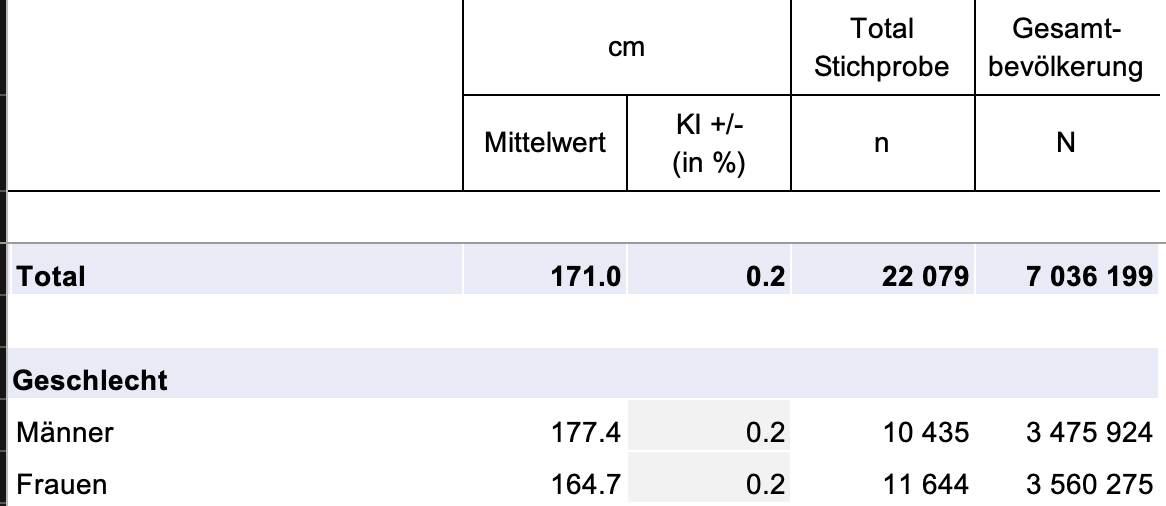

In [2]:
Image("durchschnitt_groessen.png", width=800)

11644
164.6504
0.1508


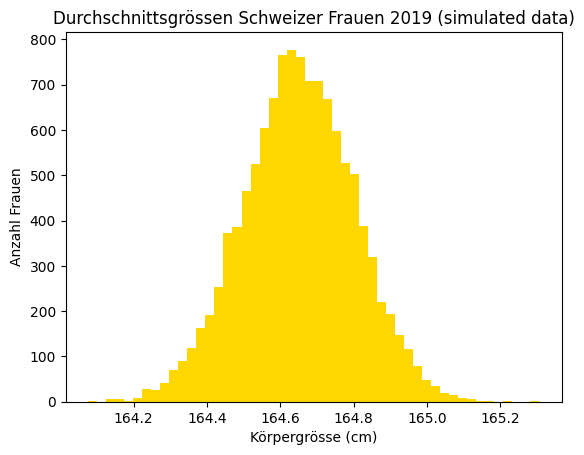

In [3]:
# Parameters of distribution
p_mean = 164.65
p_std = 0.15
p_n = 11644

# Setting a seed to restore the random numbers later
random.seed(42)

# Generate (normally distributed) data with mean = 2800 g and standard deviation = 240 g
pop = np.random.normal(loc=p_mean, scale=p_std, size=p_n)
print(f'{len(pop):.0f}')
print(f'{np.mean(pop):.4f}')
print(f'{np.std(pop):.4f}')

# Plot histogram based on the data
plt.hist(pop, bins = 50, color='gold')
plt.title('Durchschnittsgrössen Schweizer Frauen 2019 (simulated data)')
plt.xlabel('Körpergrösse (cm)')
plt.ylabel('Anzahl Frauen')

plt.show()

## Single random sample from the population

Mean: 164.6583
Standard deviation: 0.1481


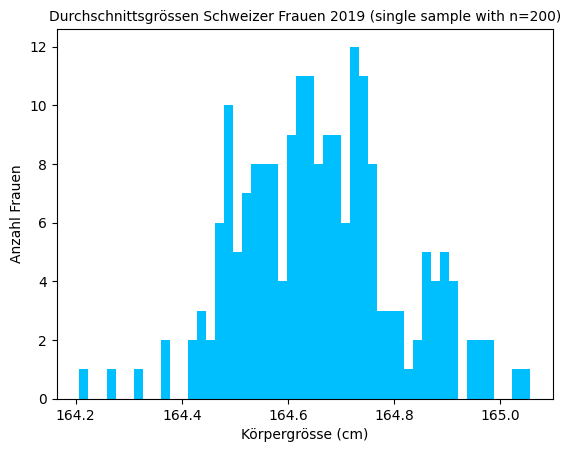

In [4]:
# Sample size
sample_size = 200

# Setting a seed to restore the random numbers later
random.seed(42)

# Random sample
random_sample = random.sample(list(pop), sample_size)

# Statistics of the sample
print(f'Mean: {statistics.mean(random_sample):.4f}')
print(f'Standard deviation: {statistics.stdev(random_sample):.4f}')

# Plot histogram based on the sample
plt.hist(random_sample, bins = 50, color='deepskyblue')
plt.title(f'Durchschnittsgrössen Schweizer Frauen 2019 (single sample with n={sample_size})', fontsize=10)
plt.xlabel('Körpergrösse (cm)')
plt.ylabel('Anzahl Frauen')

plt.show()

## Repeated random sampling 'with replacement' (bootstrapping)

164.6523
0.1497


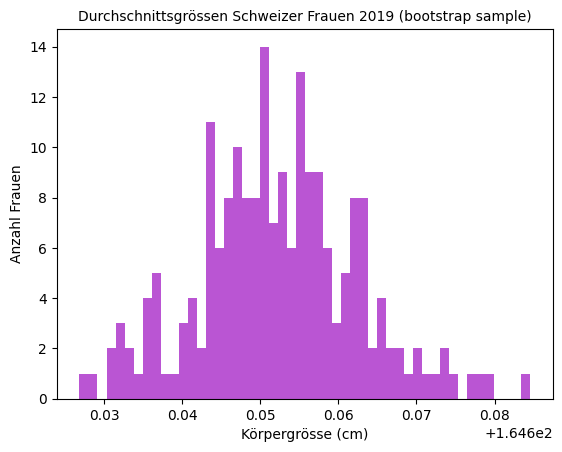

In [5]:
def bootstrap(p_mean= 164.65, p_std= 0.15, num_iter = 200, sample_size = 200):
    """
    Creates bootstrap sample from a distribution.

    :param p_mean population mean. Type = int, float
    :param p_std. Type = int, float
    :param p_n. Type = int, float
    :param num_iterations: number of iterations. Type = int
    :param sample_size: size of single bootstrap sample. Type = int
    :return: plot of bootstrap sample.
    """

    # Setting a seed to restore the random numbers later
    random.seed(42)

    # Generate (normally distributed) data
    pop = np.random.normal(loc=p_mean, scale=p_std, size=p_n)

    # Create empty lists to save results of iterations
    sample_mean = []
    sample_std  = []

    # Loop for iterations
    for i in range(num_iter):
        samp = random.sample(pop.tolist(), sample_size)
        avg = np.mean(samp)
        std = np.std(samp)
        sample_mean.append(avg)
        sample_std.append(std)

    # Print mean and sd of bootsstapped distribution
    print(f'{np.mean(sample_mean):.4f}')
    print(f'{np.mean(sample_std):.4f}')

    # Plot histogram based on the bootstrapped data
    plt.hist(sample_mean, bins = 50, color='mediumorchid')
    plt.title('Durchschnittsgrössen Schweizer Frauen 2019 (bootstrap sample)', fontsize=10)
    plt.xlabel('Körpergrösse (cm)')
    plt.ylabel('Anzahl Frauen')
    plt.show()

# Function call
bootstrap(p_mean=164.65, p_std=0.15, num_iter = 200, sample_size = 200)


### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [6]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.2.0-1015-azure
Datetime: 2023-10-27 12:59:10
Python Version: 3.10.13
-----------------------------------
